# TELECOM CHURN PREDICTION

#### PROBLEM STATEMENT

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

#### BUSINESS OBJECTIVE

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

-  It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

-  It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

-  Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

-  Recommend strategies to manage customer churn based on your observations.

In [1]:
#IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#FOR BETTER VISUALIZATION,SETTING OPTIONS TO VISUALIZE MAXIMUM COLUMNS & ROWS
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

In [3]:
#IMPORT THE DATA
df = pd.read_csv('train.csv').set_index('id')
unseen = pd.read_csv('test.csv').set_index('id')

In [4]:
#DISPLAY THE FIRST FIVE ROWS
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.

In [5]:
#DISPLAY THE DATATYPES OF THE DATA
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam

In [6]:
#INSPECT THE SHAPE OF THE DATA
print('There are {0} rows and {1} columns in the data'.format(df.shape[0],df.shape[1]))
print('There are {0} rows and {1} columns in the data'.format(unseen.shape[0],unseen.shape[1]))

There are 69999 rows and 171 columns in the data
There are 30000 rows and 170 columns in the data


In [7]:
#NOW LETS IMPORT THE DICTIONARY
dict = pd.read_csv('data_dictionary.csv')

In [8]:
#LETS UNDERSTAND THE SUMMARY STATISTICS
df.describe(percentiles = [.9,.99])

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69

In [9]:
#CREATING A BACKUP OF THE DATA
original = df.copy()

#### DATA PREPARATION

##### MISSING VALUES TREATMENT

In [10]:
print(df.info())
def dfdetails(df):
    return pd.DataFrame({
        'Datatype': df.dtypes.astype(str),
        'Non Null count': df.count(axis = 0).astype(int),
        'Null Count': df.isnull().sum().astype(int),
        'Null Percentage': round(((df.isnull().sum()/len(df))*100),2),
        'Unique Values count' : df.nunique().astype(int)
        }).sort_values(by = "Null Percentage",ascending = False)

dfdetails(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.9+ MB
None


,Datatype,Non Null count,Null Count,Null Percentage,Unique Values count
count_rech_2g_6,float64,17568,52431,74.90,30
arpu_2g_6,float64,17568,52431,74.90,5389
night_pck_user_6,float64,17568,52431,74.90,2
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
arpu_3g_6,float64,17568,52431,74.90,5506
fb_user_6,float64,17568,52431,74.90,2


In [11]:
#Lets create column name list by types of columns
df.columns.to_list()

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og

In [12]:
#GROUPING CATEGORIES BASED ON THE COLUMN TYPES:
dates = [date for date in df.columns if 'date' in date]        
cats = [cols for cols in df.columns if 'user' in cols]        
nums = [column for column in df.columns if column not in dates + cats]


In [13]:
#CHECK IF ALL COLUMNS ARE CATEGORIZED:
print("#DATE COLUMNS:{0}\n#CATEGORY COLUMNS:{1}\n#NUMERICAL COLUMNS:{2}".format(len(dates),len(cats),len(nums)))
print("TOTAL NO OF COLUMNS:",len(dates)+len(cats)+len(nums))

#DATE COLUMNS:9
#CATEGORY COLUMNS:6
#NUMERICAL COLUMNS:156
TOTAL NO OF COLUMNS: 171


In [14]:
#LETS REPLACE MISSING VALUES IN THE CATEGORICAL COLUMNS WITH '-1' WHERE -1 WILL BE A NEW CATEGORY
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  17568 non-null  float64
 1   night_pck_user_7  17865 non-null  float64
 2   night_pck_user_8  18417 non-null  float64
 3   fb_user_6         17568 non-null  float64
 4   fb_user_7         17865 non-null  float64
 5   fb_user_8         18417 non-null  float64
dtypes: float64(6)
memory usage: 3.7 MB


In [15]:
df[cats] = df[cats].apply(lambda x:x.fillna(-1))
unseen[cats]=unseen[cats].apply(lambda x:x.fillna(-1))

In [16]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  69999 non-null  float64
 1   night_pck_user_7  69999 non-null  float64
 2   night_pck_user_8  69999 non-null  float64
 3   fb_user_6         69999 non-null  float64
 4   fb_user_7         69999 non-null  float64
 5   fb_user_8         69999 non-null  float64
dtypes: float64(6)
memory usage: 3.7 MB


In [17]:
unseen[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  30000 non-null  float64
 1   night_pck_user_7  30000 non-null  float64
 2   night_pck_user_8  30000 non-null  float64
 3   fb_user_6         30000 non-null  float64
 4   fb_user_7         30000 non-null  float64
 5   fb_user_8         30000 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [18]:
# NOW THAT WE HAVE IMPUTED THE CATEGORICAL COLUMNS, LETS NOW IMPUTE THE OTHER COLUMNS
missing_cols_df = round((df.isnull().sum()/len(df.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_df

,Null
date_of_last_rech_data_6,74.90
arpu_2g_6,74.90
total_rech_data_6,74.90
max_rech_data_6,74.90
av_rech_amt_data_6,74.90
arpu_3g_6,74.90
count_rech_2g_6,74.90
count_rech_3g_6,74.90
arpu_3g_7,74.48
count_rech_2g_7,74.48


In [19]:
missing_cols_unseen = round((unseen.isnull().sum()/len(unseen.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_unseen

,Null
arpu_3g_6,74.72
date_of_last_rech_data_6,74.72
max_rech_data_6,74.72
count_rech_3g_6,74.72
total_rech_data_6,74.72
av_rech_amt_data_6,74.72
count_rech_2g_6,74.72
arpu_2g_6,74.72
av_rech_amt_data_7,74.31
arpu_2g_7,74.31


Now lets check the missing values in customer data if the total recharge and date of last recharge

In [20]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(),["total_rech_data_6","date_of_last_rech_data_6"]].head()

,total_rech_data_6,date_of_last_rech_data_6
id,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


In [21]:
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(),["total_rech_data_7","date_of_last_rech_data_7"]].head()

,total_rech_data_7,date_of_last_rech_data_7
id,,
0,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN


In [22]:
df.loc[df.total_rech_data_8.isnull() & df.date_of_last_rech_data_8.isnull(),["total_rech_data_8","date_of_last_rech_data_8"]].head()

,total_rech_data_8,date_of_last_rech_data_8
id,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


*From the above, we can observe that the recharge date and recharge value are missing together meaning the customer didn't recharge*

*Therefore we can impute these missing values with 0 based on months data*


In [23]:
missing_6_df = list(missing_cols_df.index[missing_cols_df['Null'] == 74.90])
missing_7_df = list(missing_cols_df.index[missing_cols_df['Null'] == 74.48])
missing_8_df = list(missing_cols_df.index[missing_cols_df['Null'] == 73.69])

In [24]:
missing_6_unseen = list(missing_cols_unseen.index[missing_cols_unseen['Null'] == 74.72])
missing_7_unseen = list(missing_cols_unseen.index[missing_cols_unseen['Null'] == 74.31])
missing_8_unseen = list(missing_cols_unseen.index[missing_cols_unseen['Null'] == 73.59])

In [25]:
print(missing_6_df)
print('\n')
print(missing_7_df)
print('\n')
print(missing_8_df)

['date_of_last_rech_data_6', 'arpu_2g_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'count_rech_2g_6', 'count_rech_3g_6']


['arpu_3g_7', 'count_rech_2g_7', 'date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_3g_7', 'arpu_2g_7', 'av_rech_amt_data_7']


['count_rech_2g_8', 'total_rech_data_8', 'arpu_3g_8', 'arpu_2g_8', 'av_rech_amt_data_8', 'date_of_last_rech_data_8', 'count_rech_3g_8', 'max_rech_data_8']


In [26]:
#Impute the missing values
df[missing_6_df] = df[missing_6_df].apply(lambda x:x.fillna(0))
df[missing_7_df] = df[missing_7_df].apply(lambda x:x.fillna(0))
df[missing_8_df] = df[missing_8_df].apply(lambda x:x.fillna(0))

In [27]:
print(missing_6_unseen)
print('\n')
print(missing_7_unseen)
print('\n')
print(missing_8_unseen)

['arpu_3g_6', 'date_of_last_rech_data_6', 'max_rech_data_6', 'count_rech_3g_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'arpu_2g_6']


['av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_2g_7', 'count_rech_3g_7', 'total_rech_data_7', 'arpu_3g_7', 'max_rech_data_7', 'date_of_last_rech_data_7']


['arpu_2g_8', 'total_rech_data_8', 'max_rech_data_8', 'date_of_last_rech_data_8', 'arpu_3g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'count_rech_2g_8']


In [28]:
#Impute the missing values
unseen[missing_6_unseen] = unseen[missing_6_unseen].apply(lambda x:x.fillna(0))
unseen[missing_7_unseen] = unseen[missing_7_unseen].apply(lambda x:x.fillna(0))
unseen[missing_8_unseen] = unseen[missing_8_unseen].apply(lambda x:x.fillna(0))

In [29]:
missing_cols_df = round((df.isnull().sum()/len(df.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_df

,Null
loc_ic_t2t_mou_8,5.29
loc_og_t2c_mou_8,5.29
loc_og_t2f_mou_8,5.29
spl_og_mou_8,5.29
loc_og_t2m_mou_8,5.29
loc_ic_t2m_mou_8,5.29
loc_og_mou_8,5.29
loc_og_t2t_mou_8,5.29
loc_ic_t2f_mou_8,5.29
std_og_t2f_mou_8,5.29


In [30]:
missing_cols_unseen = round((unseen.isnull().sum()/len(unseen.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_unseen

,Null
loc_ic_t2t_mou_8,5.58
roam_og_mou_8,5.58
loc_og_t2t_mou_8,5.58
loc_og_t2m_mou_8,5.58
std_ic_t2f_mou_8,5.58
loc_og_t2f_mou_8,5.58
loc_og_mou_8,5.58
std_ic_t2m_mou_8,5.58
std_og_t2t_mou_8,5.58
std_og_t2m_mou_8,5.58


In [31]:
missing_mou_6_df = list(missing_cols_df.index[missing_cols_df['Null'] == 3.95])
missing_mou_7_df = list(missing_cols_df.index[missing_cols_df['Null'] == 3.84])
missing_mou_8_df = list(missing_cols_df.index[missing_cols_df['Null'] == 5.29])

In [32]:
missing_mou_6_unseen = list(missing_cols_unseen.index[missing_cols_unseen['Null'] == 3.90])
missing_mou_7_unseen = list(missing_cols_unseen.index[missing_cols_unseen['Null'] == 3.91])
missing_mou_8_unseen = list(missing_cols_unseen.index[missing_cols_unseen['Null'] == 5.58])

In [33]:
len(missing_mou_6_df) == len(missing_mou_7_df) == len(missing_mou_8_df)

True

In [34]:
len(missing_mou_6_unseen) == len(missing_mou_7_unseen) == len(missing_mou_8_unseen)

True

In [35]:
df[missing_mou_6_df] = df[missing_mou_6_df].apply(lambda x : x.fillna(0))
df[missing_mou_7_df] = df[missing_mou_7_df].apply(lambda x : x.fillna(0))
df[missing_mou_8_df] = df[missing_mou_8_df].apply(lambda x : x.fillna(0))

In [36]:
unseen[missing_mou_6_unseen] = unseen[missing_mou_6_unseen].apply(lambda x : x.fillna(0))
unseen[missing_mou_7_unseen] = unseen[missing_mou_7_unseen].apply(lambda x : x.fillna(0))
unseen[missing_mou_8_unseen] = unseen[missing_mou_8_unseen].apply(lambda x : x.fillna(0))

In [37]:
missing_cols_df = round((df.isnull().sum()/len(df.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_df

,Null
date_of_last_rech_8,3.52
date_of_last_rech_7,1.76
date_of_last_rech_6,1.57
last_date_of_month_8,1.05
std_og_t2o_mou,1.00
loc_ic_t2o_mou,1.00
loc_og_t2o_mou,1.00
last_date_of_month_7,0.57
circle_id,0.00
date_of_last_rech_data_7,0.00


In [38]:
missing_cols_unseen = round((unseen.isnull().sum()/len(unseen.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_unseen

,Null
date_of_last_rech_8,3.87
date_of_last_rech_7,1.78
date_of_last_rech_6,1.69
last_date_of_month_8,1.22
std_og_t2o_mou,1.05
loc_ic_t2o_mou,1.05
loc_og_t2o_mou,1.05
last_date_of_month_7,0.67
circle_id,0.00
date_of_last_rech_data_6,0.00


In [39]:
for col in df.columns:
    if 'date' in col:
        del df[col]

In [40]:
for col in unseen.columns:
    if 'date' in col:
        del unseen[col]

In [41]:
missing_cols_df = round((df.isnull().sum()/len(df.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_df

,Null
loc_og_t2o_mou,1.0
std_og_t2o_mou,1.0
loc_ic_t2o_mou,1.0
total_rech_data_6,0.0
total_rech_amt_7,0.0
total_rech_amt_8,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
last_day_rch_amt_6,0.0


In [42]:
missing_cols_unseen = round((unseen.isnull().sum()/len(unseen.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_unseen

,Null
std_og_t2o_mou,1.05
loc_ic_t2o_mou,1.05
loc_og_t2o_mou,1.05
circle_id,0.00
last_day_rch_amt_8,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00


In [43]:
df.shape

(69999, 162)

In [44]:
unseen.shape

(30000, 161)

In [45]:
df = df.dropna(axis = 1)
unseen = unseen.dropna(axis=1)

In [46]:
missing_cols_df = round((df.isnull().sum()/len(df.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)
missing_cols_unseen = round((unseen.isnull().sum()/len(unseen.index))*100,2).to_frame('Null').sort_values('Null',ascending = False)

In [47]:
print(missing_cols_df)

                    Null
circle_id            0.0
total_rech_data_6    0.0
total_rech_amt_8     0.0
max_rech_amt_6       0.0
max_rech_amt_7       0.0
max_rech_amt_8       0.0
last_day_rch_amt_6   0.0
last_day_rch_amt_7   0.0
last_day_rch_amt_8   0.0
total_rech_data_7    0.0
total_rech_amt_6     0.0
total_rech_data_8    0.0
max_rech_data_6      0.0
max_rech_data_7      0.0
max_rech_data_8      0.0
count_rech_2g_6      0.0
count_rech_2g_7      0.0
count_rech_2g_8      0.0
total_rech_amt_7     0.0
total_rech_num_8     0.0
count_rech_3g_7      0.0
spl_ic_mou_7         0.0
std_ic_mou_6         0.0
std_ic_mou_7         0.0
std_ic_mou_8         0.0
total_ic_mou_6       0.0
total_ic_mou_7       0.0
total_ic_mou_8       0.0
spl_ic_mou_6         0.0
spl_ic_mou_8         0.0
total_rech_num_7     0.0
isd_ic_mou_6         0.0
isd_ic_mou_7         0.0
isd_ic_mou_8         0.0
ic_others_6          0.0
ic_others_7          0.0
ic_others_8          0.0
total_rech_num_6     0.0
count_rech_3g_6      0.0


In [48]:
print(missing_cols_unseen)

                    Null
circle_id            0.0
last_day_rch_amt_8   0.0
total_rech_amt_7     0.0
total_rech_amt_8     0.0
max_rech_amt_6       0.0
max_rech_amt_7       0.0
max_rech_amt_8       0.0
last_day_rch_amt_6   0.0
last_day_rch_amt_7   0.0
total_rech_data_6    0.0
total_rech_num_8     0.0
total_rech_data_7    0.0
total_rech_data_8    0.0
max_rech_data_6      0.0
max_rech_data_7      0.0
max_rech_data_8      0.0
count_rech_2g_6      0.0
count_rech_2g_7      0.0
total_rech_amt_6     0.0
total_rech_num_7     0.0
count_rech_3g_6      0.0
spl_ic_mou_6         0.0
std_ic_t2o_mou_8     0.0
std_ic_mou_6         0.0
std_ic_mou_7         0.0
std_ic_mou_8         0.0
total_ic_mou_6       0.0
total_ic_mou_7       0.0
total_ic_mou_8       0.0
spl_ic_mou_7         0.0
total_rech_num_6     0.0
spl_ic_mou_8         0.0
isd_ic_mou_6         0.0
isd_ic_mou_7         0.0
isd_ic_mou_8         0.0
ic_others_6          0.0
ic_others_7          0.0
ic_others_8          0.0
count_rech_2g_8      0.0


In [49]:
df['circle_id'].nunique()

1

Since the circle ID has only one value, it may not be useful for our investigation. Therefore, lets delete circle ID

In [50]:
df = df.drop('circle_id',axis = 1)
unseen = unseen.drop('circle_id',axis = 1)

In [51]:
df.shape

(69999, 158)

In [52]:
unseen.shape

(30000, 157)

In [53]:
df.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t_mou_6      float64
std_og_t2t_mou_7      float64
std_og_t2t_mou_8      float64
std_og_t2m

In the filtered dataset except ID and CHURN columns all the columns are numeric types. Hence, converting ID and CHURN datatype to category.

In [54]:
df['churn_probability'] = df['churn_probability'].astype('category')
df[cats]=df[cats].astype('category')

In [55]:
unseen.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t_mou_6      float64
std_og_t2t_mou_7      float64
std_og_t2t_mou_8      float64
std_og_t2m

In [56]:
unseen[cats]=unseen[cats].astype('category')

In [57]:
# List only the numeric columns
num_cols = df.select_dtypes(exclude=['category']).columns

In [58]:
df[num_cols]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,0.00,122.07,0.00,0.00,122.08,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,

In [59]:
df[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.

<AxesSubplot:>

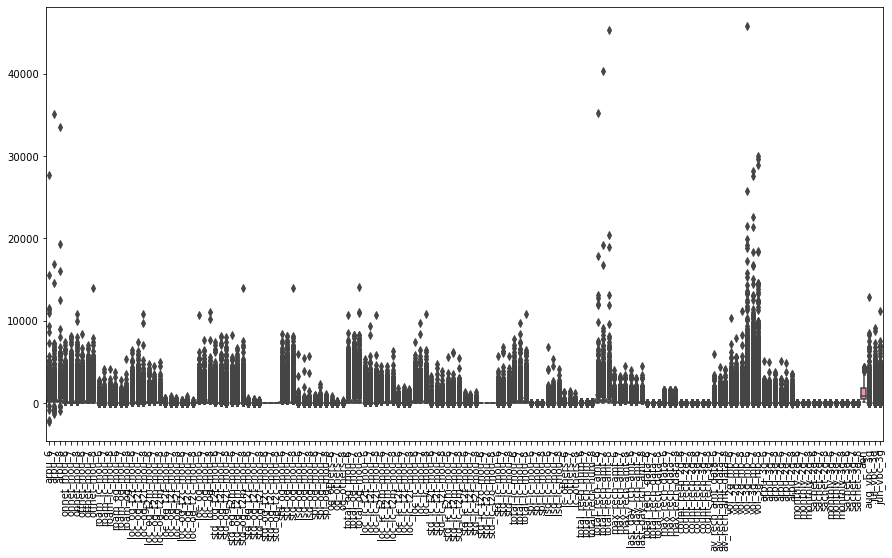

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = df[num_cols])

### OUTLIER TREATMENT

In [61]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [62]:
# cap outliers in the numeric columns
df[num_cols] = df[num_cols].apply(cap_outliers, axis=0)

In [63]:
df[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.

<AxesSubplot:>

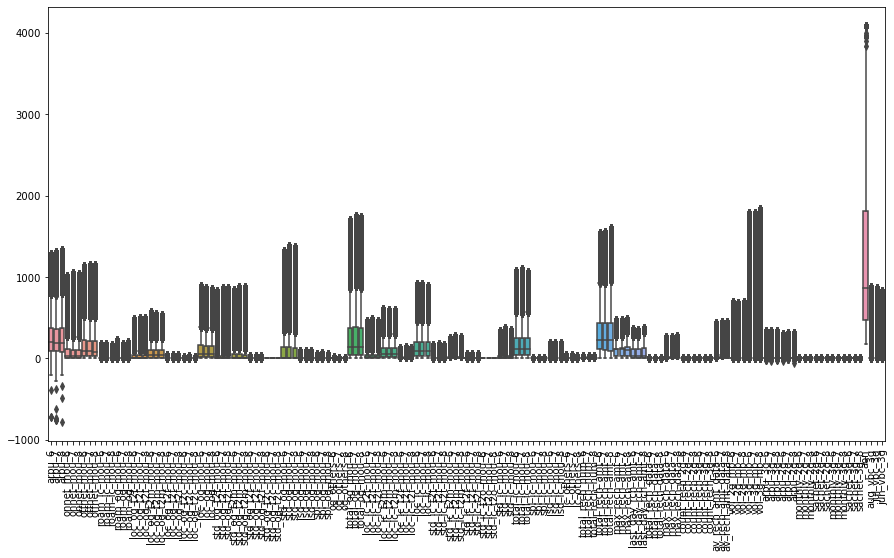

In [64]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = df[num_cols])

### EDA

In [65]:
df[num_cols] = df[num_cols].apply(pd.to_numeric)
df[cats] = df[cats].apply(lambda column: column.astype("category"), axis=0)

#####  UNIVARIATE ANALYSIS

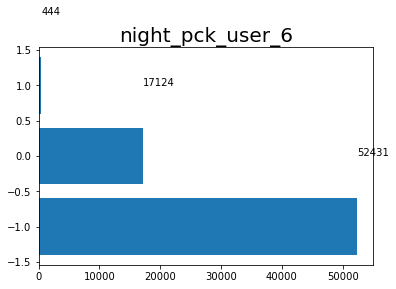

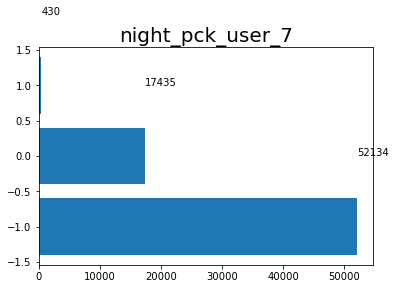

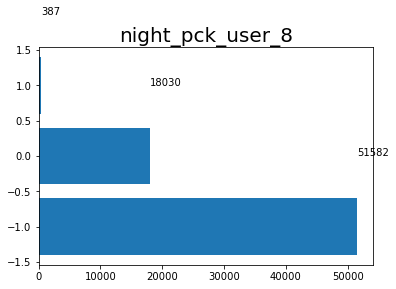

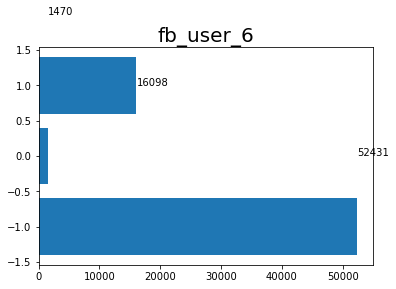

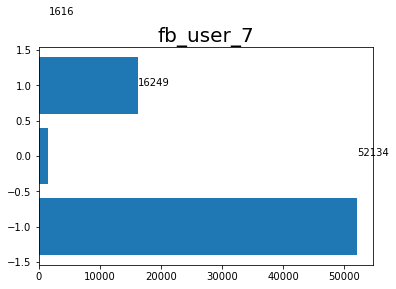

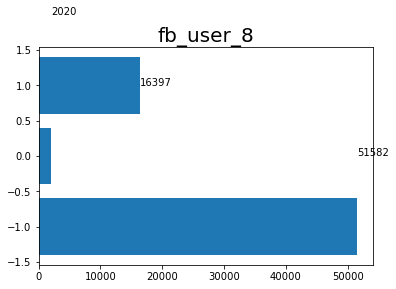

In [66]:
for cols in cats:
    plt.title(cols,fontdict = {'fontsize':20})
    x = df[cols].value_counts().index.to_list()
    y = df[cols].value_counts().to_list()
    plt.barh(x, y)
    for index, value in enumerate(y):
        plt.text(value, index,str(value))
    plt.show()

[0, 1] [62867, 7132]


<BarContainer object of 2 artists>

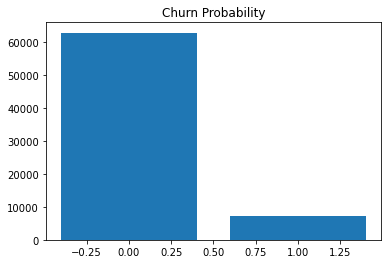

In [67]:
x = df['churn_probability'].value_counts().index.to_list()
y = df['churn_probability'].value_counts().to_list()
print(x,y)
plt.title("Churn Probability")
plt.bar(x, y)

##### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

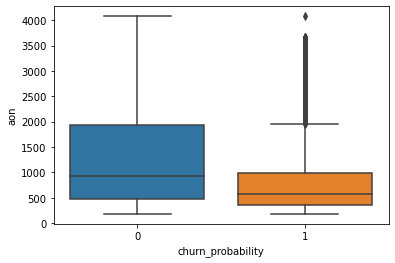

In [68]:
sns.boxplot(x = 'churn_probability',y='aon',data = df)

In [69]:
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

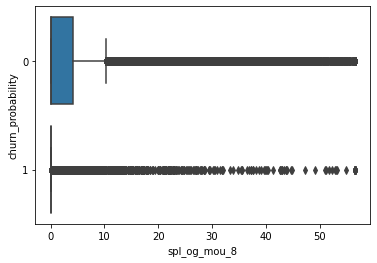

In [70]:
bivariate(df.spl_og_mou_8, df.churn_probability)

In [71]:
pd.crosstab(df.churn_probability, df.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn_probability,,,
0,87.375441,96.627842,96.899225
1,12.624559,3.372158,3.100775


In [72]:
pd.crosstab(df.churn_probability, df.sachet_3g_8)

sachet_3g_8,0.000000,1.000000,2.000000,2.125593
churn_probability,,,,
0,60016,1904,428,519
1,7043,65,7,17


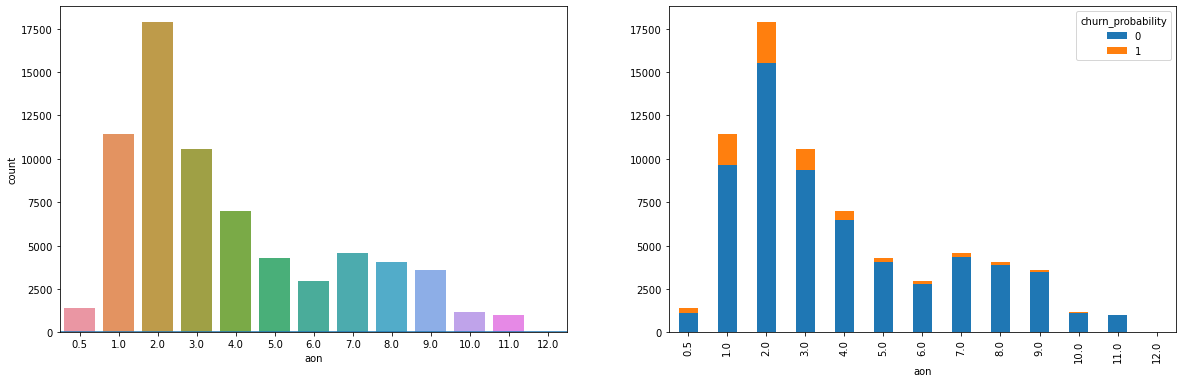

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(df['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sns.countplot(pd.cut(round(((df['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((df['aon']/30)/12),1), bins = bins, labels = labels ), df['churn_probability']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

-  We can see more number of obervations between 1 and 3 years
-  The churn rate is also higher in this time than the others

In [74]:
#Cap outliers in all numeric variables with k-sigma technique
df[num_cols] = df[num_cols].apply(cap_outliers, axis=0)

In [75]:
#Cap outliers in all numeric variables with k-sigma technique
unseen[num_cols] = unseen[num_cols].apply(cap_outliers, axis=0)

In [76]:
# change churn to numeric
df['churn_probability'] = pd.to_numeric(df['churn_probability'])

## MODELLING

In [77]:
#Check shape before splitting
df.shape

(69999, 158)

In [78]:
unseen.shape

(30000, 157)

In [79]:
#Define X and y
X = df.drop(['churn_probability'],axis = 1)
y = df.churn_probability

In [80]:
vars = X.columns

In [81]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.25, random_state = 42, stratify = y)

In [82]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52499, 157)
(52499,)
(17500, 157)
(17500,)


In [83]:
unseen.shape

(30000, 157)

##### Aggregating the categorical columns

In [84]:
train = pd.concat([X_train,y_train],axis = 1)

In [85]:
# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn_probability.mean())
print(train.groupby('night_pck_user_7').churn_probability.mean())
print(train.groupby('night_pck_user_8').churn_probability.mean())
print(train.groupby('fb_user_6').churn_probability.mean())
print(train.groupby('fb_user_7').churn_probability.mean())
print(train.groupby('fb_user_8').churn_probability.mean())

night_pck_user_6
-1.0    0.106798
0.0     0.085982
1.0     0.133333
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.114189
0.0     0.066090
1.0     0.061728
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.126553
0.0     0.032660
1.0     0.029221
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.106798
0.0     0.103800
1.0     0.085683
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.114189
0.0     0.082923
1.0     0.064291
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.126553
0.0     0.061761
1.0     0.028961
Name: churn_probability, dtype: float64


In [86]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.106798, 0: 0.085982, 1: 0.061728},
           'night_pck_user_7' : {-1: 0.114189, 0: 0.066090, 1: 0.061728},
           'night_pck_user_8' : {-1: 0.126553, 0: 0.032660, 1: 0.029221},
           'fb_user_6'        : {-1: 0.106798, 0: 0.103800, 1: 0.085683},
           'fb_user_7'        : {-1: 0.114189, 0: 0.082923, 1: 0.064291},
           'fb_user_8'        : {-1: 0.126553, 0: 0.061761, 1: 0.028961}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [87]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cats if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52499 entries, 9837 to 18790
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  52499 non-null  category
 1   night_pck_user_7  52499 non-null  category
 2   night_pck_user_8  52499 non-null  category
 3   fb_user_6         52499 non-null  category
 4   fb_user_7         52499 non-null  category
 5   fb_user_8         52499 non-null  category
dtypes: category(6)
memory usage: 718.5 KB


# PCA

In [88]:
# import required libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [89]:
#apply pca to train data
pca = Pipeline([('scaler', StandardScaler()),('pca', PCA())])

In [90]:
pca.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [91]:
churn_pca = pca.fit_transform(X_train)

In [92]:
#Extract pca from pipeline
pca = pca.named_steps['pca']

In [93]:
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)

0       15.91
1       27.54
2       34.84
3       39.74
4       43.49
5       46.25
6       48.92
7       51.26
8       53.38
9       55.41
10      57.30
11      59.11
12      60.82
13      62.50
14      64.09
15      65.42
16      66.65
17      67.86
18      69.01
19      70.05
20      71.06
21      72.02
22      72.96
23      73.88
24      74.77
25      75.64
26      76.49
27      77.23
28      77.96
29      78.67
30      79.34
31      79.99
32      80.63
33      81.24
34      81.84
35      82.43
36      83.00
37      83.56
38      84.11
39      84.64
40      85.14
41      85.64
42      86.11
43      86.57
44      87.02
45      87.45
46      87.88
47      88.29
48      88.70
49      89.08
50      89.47
51      89.84
52      90.18
53      90.52
54      90.84
55      91.17
56      91.48
57      91.77
58      92.07
59      92.36
60      92.64
61      92.92
62      93.17
63      93.42
64      93.67
65      93.90
66      94.12
67      94.33
68      94.53
69      94.74
70      94.93
71    

- ~53 components explain 90% variance
- ~72 components explain 95% variance



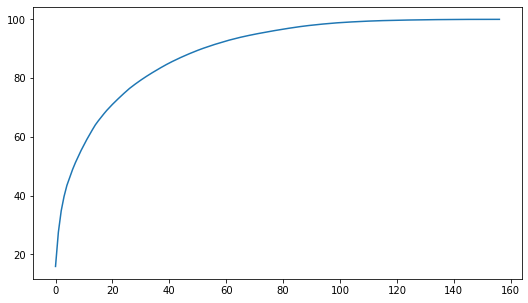

In [94]:
#Plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals = 4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### PCA and Logistic Regression

In [95]:
# create pipeline
PCA_VARS = 53
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [96]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8023009962094516

##### Evaluate on test data

In [97]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[12603  3114]
 [  285  1498]]
Sensitivity: 	0.84
Specificity: 	0.8
AUC:    	 0.89


# Hyperparameter tuning - PCA and Logistic Regression¶

In [98]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [53, 72], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model1 = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [99]:
# fit model
model1.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [53, 72]},
             scoring='roc_auc', verbose=1)

In [100]:
# cross validation results
pd.DataFrame(model1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.923756,0.487277,0.000000,0.000000,0.1,l1,53,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,10.909227,0.249135,0.000000,0.000000,0.1,l1,72,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,10.599749,0.284544,0.295836,0.022099,0.1,l2,53,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.882886,0.897122,0.898624,0.888514,0.891967,0.891823,0.005747,16
3,13.107064,0.056231,0.268646,0.031349,0.1,l2,72,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.888708,0.903819,0.905765,0.893880,0.896419,0.897718,0.006318,1
4,8.608324,0.608832,0.000000,0.000000,0.5,l1,53,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,9.642047,0.160758,0.000000,0.000000,0.5,l1,72,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,9.685878,0.287462,0.301026,0.032011,0.5,l2,53,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.882886,0.897408,0.898651,0.888619,0.892291,0.891971,0.005797,13
7,12.626349,0.202002,0.336272,0.063854,0.5,l2,72,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.887955,0.903793,0.904746,0.894041,0.897360,0.897579,0.006248,2
8,8.198812,0.125774,0.000000,0.000000,1,l1,53,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,9.960348,0.142169,0.000000,0.000000,1,l1,72,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [101]:
# print best hyperparameters
print("Best AUC: ", model1.best_score_)
print("Best hyperparameters: ", model1.best_params_)

Best AUC:  0.8977180648382397
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 72}


In [102]:
# predict churn on test data
y_pred = model1.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model1.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[12656  3061]
 [  262  1521]]
Sensitivity: 	0.85
Specificity: 	0.81
AUC:    	 0.9


### RANDOM FOREST

In [103]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model2 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [104]:
# fit model
model2.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [105]:
# print best hyperparameters
print("Best AUC: ", model2.best_score_)
print("Best hyperparameters: ", model2.best_params_)

Best AUC:  0.939069005778979
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [106]:
# predict churn on test data
y_pred = model2.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model2.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[15428   289]
 [  767  1016]]
Sensitivity: 	0.57
Specificity: 	0.98
AUC:    	 0.94


**Poor sensitivity. The best model is PCA along with Logistic regression.**

##### LETS TEST ON UNSEEN DATA

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [109]:
unseen['churn_probability'] = model1.predict(unseen)

In [115]:
unseen = unseen.reset_index('id')

In [117]:
output = unseen[['id','churn_probability']]

In [120]:
output.head()

,id,churn_probability
0,69999,1
1,70000,1
2,70001,1
3,70002,1
4,70003,1


In [121]:
sample = pd.read_csv('sample.csv')

In [122]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [123]:
output.to_csv('sample.csv',index= False)